Import files from github
- Repository Link. https://github.com/ganyunhee/ai_teachable_machine

In [ ]:
!git clone https://github.com/ganyunhee/ai_teachable_machine

Cloning into 'ai_teachable_machine'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Receiving objects: 100% (40/40), 51.75 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Construct Model via Keras Library

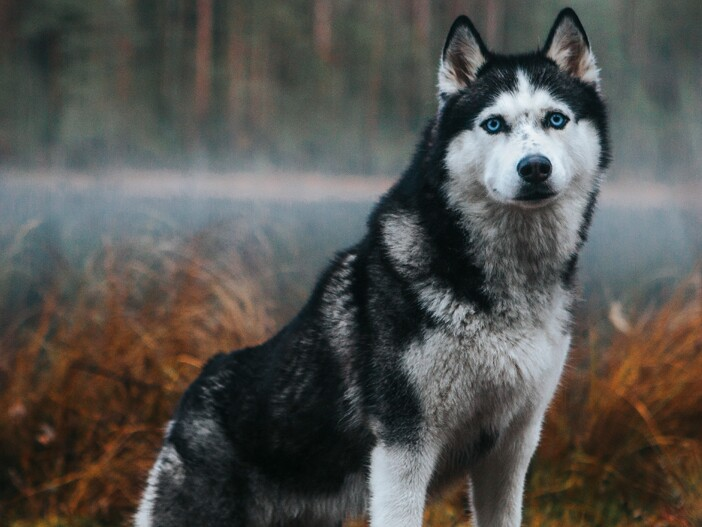


1/1 [==============================] - 1s 1s/step
Class: Siberian Husky
Confidence Score: 0.57122594


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Create file variables
folder_path = "ai_teachable_machine/converted_keras/"
test_folder_path = "ai_teachable_machine/images/test/"
model_file = folder_path + "keras_model.h5"
labels_file = folder_path + "labels.txt"
image_file = test_folder_path + "ratgeber_hund_rasse_portraits_siberian-husky_1_1200x527..jpg"

# Load the model
model = load_model(model_file, compile=False)

# Load the labels
class_names = open(labels_file, "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open(image_file).convert("RGB")

display(image)
print()

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
